In [33]:
#Call the necessary libraries for data exploration and preprocessing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# read your data and store it into a dataframe
df=pd.read_csv("//Users/kamyasarda/vs code/career_data.csv")

In [3]:
#check the first five rows of the dataframe
df.head()

Table 1
Sr.No. Course Job profession Student Linguistic Musical Bodily Logical - Mathematical Spatial-Visualization Interpersonal Intrapersonal Naturalist s/p P1  P2   P3  P4   P5   P6  P7        P8
1      NaN    Astronomer\n   S1      11         5       12     16                     17                    11            18            19         s1  AVG POOR AVG BEST BEST AVG BEST    BEST
NaN    NaN    Astronomer\n   S2      12         6       12     16                     16                    11            18            19         s2  AVG POOR AVG BEST BEST AVG BEST    BEST
                             S3      13         7       12     16                     15                    11            18            19         s3  AVG POOR AVG BEST BEST AVG BEST    BEST
                             S4      14         8       12     16                     19                    11            18            19         s4  AVG POOR AVG BEST BEST AVG BEST    BEST

In [4]:
#check type of features inside the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3601 entries, ('Sr.No.', 'Course', 'Job profession', 'Student', 'Linguistic', 'Musical', 'Bodily', 'Logical - Mathematical', 'Spatial-Visualization', 'Interpersonal', 'Intrapersonal', 'Naturalist', 's/p', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7') to (nan, nan, 'Technician', 'S3600', '8', '9', '18', '14', '14', '19', '14', '11', 's3600', 'POOR', 'POOR', 'BEST', 'AVG', 'AVG', 'BEST', 'AVG')
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Table 1  3600 non-null   object
dtypes: object(1)
memory usage: 432.3+ KB


In [9]:
# Select only the relevant columns (Features + Target)
# These are the 8 Multiple Intelligence Scores
features = ['Linguistic', 'Musical', 'Bodily', 'Logical - Mathematical', 
            'Spatial-Visualization', 'Interpersonal', 'Intrapersonal', 'Naturalist']
target = 'Job profession'

In [10]:
#check for missing values
df.isnull().sum()

Table 1    1
dtype: int64

In [11]:
#data cleaning 
# df = df.dropna()


In [13]:
#statistical summary of the dataset
df.describe()

,Table 1
count,3600
unique,4
top,POOR
freq,1649


--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sr.No.                  72 non-null     float64
 1   Course                  0 non-null      float64
 2   Job profession          3600 non-null   object 
 3   Student                 3600 non-null   object 
 4   Linguistic              3600 non-null   int64  
 5   Musical                 3600 non-null   int64  
 6   Bodily                  3600 non-null   int64  
 7   Logical - Mathematical  3600 non-null   int64  
 8   Spatial-Visualization   3600 non-null   int64  
 9   Interpersonal           3600 non-null   int64  
 10  Intrapersonal           3600 non-null   int64  
 11  Naturalist              3600 non-null   int64  
 12  s/p                     3600 non-null   object 
 13  P1                      3600 non-null   object 
 14  P2                    

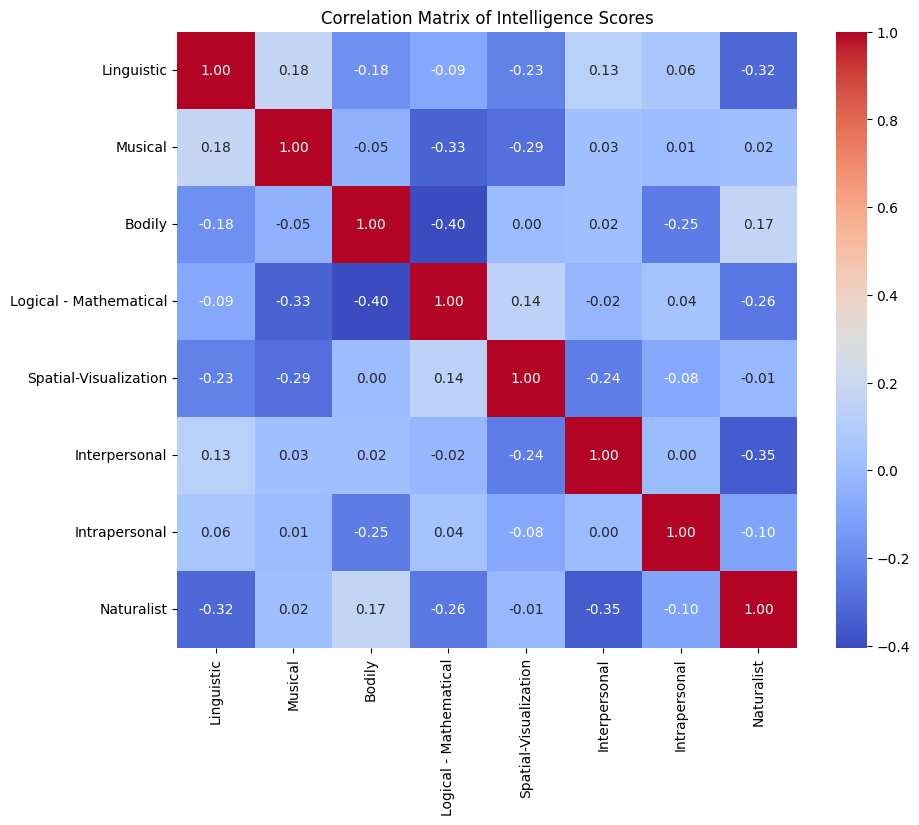

/var/folders/jn/rsz93r615x19rmqn0pywgnhm0000gn/T/ipykernel_89762/2950414445.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_jobs.values, y=top_jobs.index, palette='viridis')


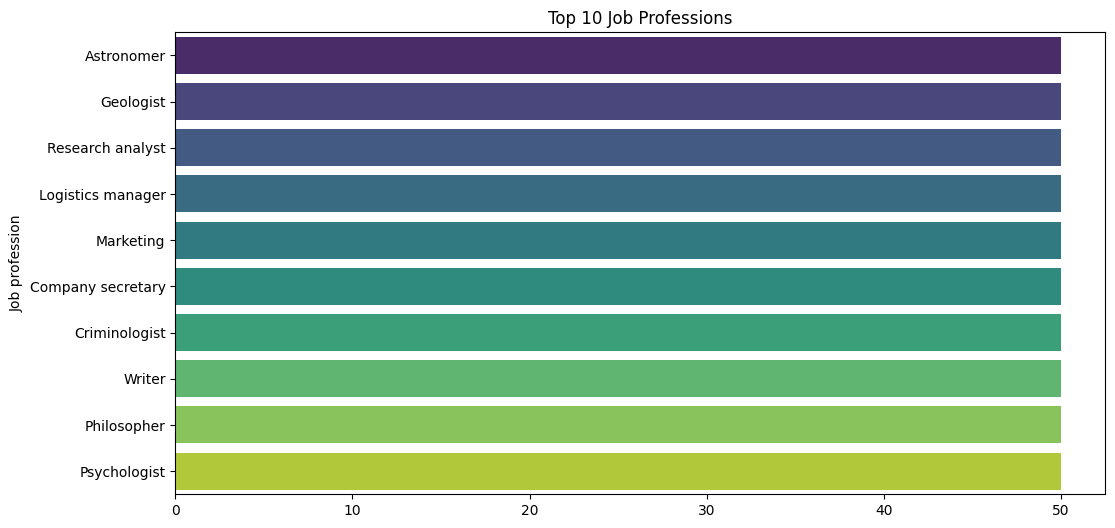

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the data using your specific path
# We use header=1 because the original file had an empty first row
file_path = "//Users/kamyasarda/vs code/career_data.csv"
df = pd.read_csv(file_path, header=1)

# 2. Basic Inspection
print("--- Data Info ---")
df.info()

print("\n--- Summary Statistics ---")
print(df.describe())

# 3. Data Cleaning
# Remove the "\n" characters from the Job profession column
df['Job profession'] = df['Job profession'].str.strip()

# 4. Check for Missing Values
print("\n--- Missing Values ---")
print(df.isnull().sum())

# 5. Visualization: Correlation Heatmap
# These are the columns we will use for clustering later
features = ['Linguistic', 'Musical', 'Bodily', 'Logical - Mathematical', 
            'Spatial-Visualization', 'Interpersonal', 'Intrapersonal', 'Naturalist']

plt.figure(figsize=(10, 8))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Intelligence Scores")
plt.show()

# 6. Visualization: Top 10 Jobs
plt.figure(figsize=(12, 6))
top_jobs = df['Job profession'].value_counts().head(10)
sns.barplot(x=top_jobs.values, y=top_jobs.index, palette='viridis')
plt.title("Top 10 Job Professions")
plt.show()

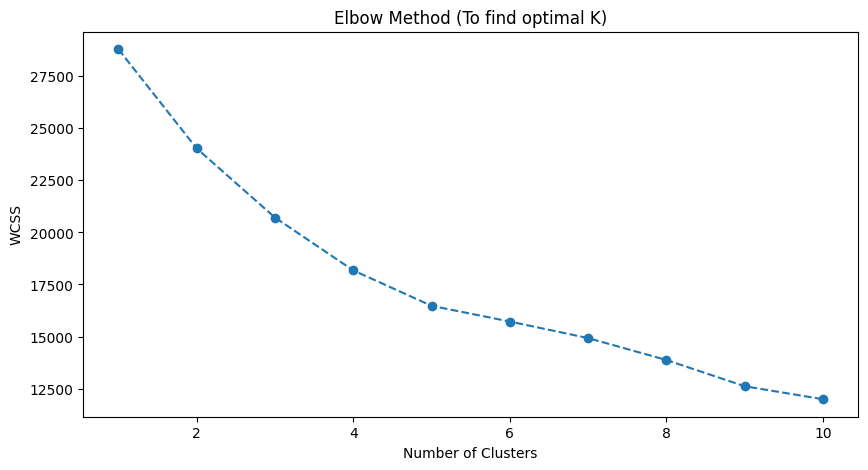

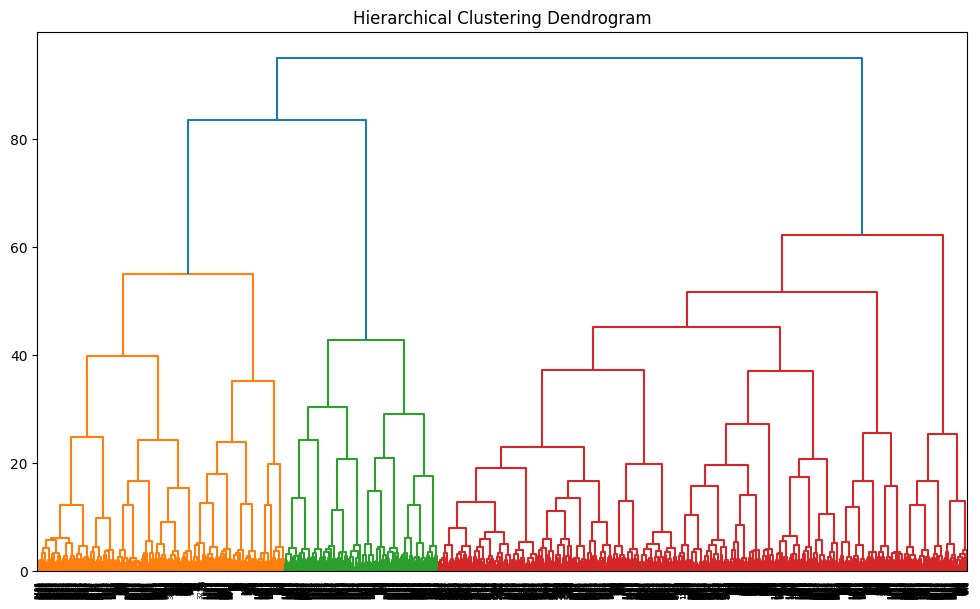


--- Cluster Profiles (Mean Scores) ---
               Linguistic    Musical     Bodily  Logical - Mathematical  \
Cluster_Label                                                             
0               14.805257  15.701314  13.121864               12.043011   
1                9.696819   7.219682  15.390656               14.746521   
2               14.162777   7.929994   9.688674               17.599886   

               Spatial-Visualization  Interpersonal  Intrapersonal  Naturalist  
Cluster_Label                                                                   
0                           7.954600      16.005974      14.324970   11.187575  
1                          10.897614      14.252485      13.556660   15.154076  
2                           9.992032      16.068298      15.664769    8.605009  

--- Top Jobs per Cluster ---

Cluster 0 Most Common Jobs:
Job profession
Actor / Actress    50
Primary Teacher    50
Music teacher      50
Name: count, dtype: int64

Cluster 1 Mo

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

# 1. Load Data
file_path = "//Users/kamyasarda/vs code/career_data.csv"
df = pd.read_csv(file_path, header=1)

# Clean Target
df['Job profession'] = df['Job profession'].str.strip()

# 2. Select & Scale Features
# We only cluster based on the 8 Intelligence Scores
features = ['Linguistic', 'Musical', 'Bodily', 'Logical - Mathematical', 
            'Spatial-Visualization', 'Interpersonal', 'Intrapersonal', 'Naturalist']
X = df[features]

# SCALING is crucial for K-Means!
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==========================================
# A. K-MEANS: Finding Optimal K (Elbow Method)
# ==========================================
wcss = [] # Within-Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method (To find optimal K)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# ==========================================
# B. HIERARCHICAL CLUSTERING (Dendrogram)
# ==========================================
# Using Ward's method as seen in your H-clustering (1).py
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 7))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.show()

# ==========================================
# C. APPLY FINAL CLUSTERING
# ==========================================
# Based on the Elbow/Dendrogram, let's pick K=3 (Common for low/med/high or profile types)
# You can change n_clusters based on your graphs!
final_k = 3
kmeans_final = KMeans(n_clusters=final_k, random_state=42)
df['Cluster_Label'] = kmeans_final.fit_predict(X_scaled)

# ==========================================
# D. CLUSTER INTERPRETATION
# ==========================================
print("\n--- Cluster Profiles (Mean Scores) ---")
# This table tells you WHO is in each group
print(df.groupby('Cluster_Label')[features].mean())

print("\n--- Top Jobs per Cluster ---")
for i in range(final_k):
    print(f"\nCluster {i} Most Common Jobs:")
    print(df[df['Cluster_Label'] == i]['Job profession'].value_counts().head(3))

✅ File loaded successfully!
✅ Variable 'data' has been defined.

--- Descriptive Statistics ---


,Linguistic,Musical,Bodily,Logical - Mathematical,Spatial-Visualization,Interpersonal,Intrapersonal,Naturalist
count,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000
mean,13.064167,9.538333,12.080278,15.510556,9.771389,15.546389,14.764167,11.035556
std,3.705923,4.270472,4.298006,3.843261,3.719793,3.523046,3.586535,4.324290
min,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,5.000000,0.000000
25%,11.000000,6.000000,8.000000,13.000000,7.000000,13.000000,12.000000,7.000000
50%,13.000000,8.000000,12.000000,17.000000,9.000000,16.000000,15.000000,11.000000
75%,16.000000,12.000000,15.000000,19.000000,12.000000,18.000000,18.000000,14.000000
max,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000


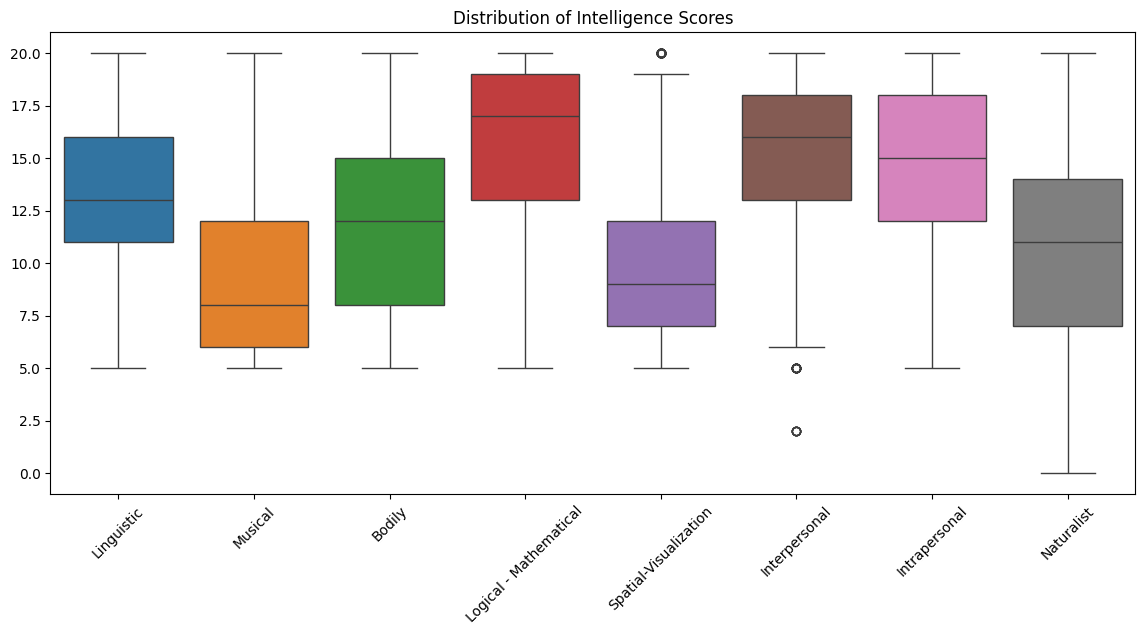

In [30]:
# ==========================================
# RUN THIS CELL TO FIX "name 'data' is not defined"
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1. LOAD THE DATA (Using the path you gave me earlier)
# If this path is wrong, update it!
file_path = "//Users/kamyasarda/vs code/career_data.csv" 

try:
    df = pd.read_csv(file_path, header=1)
    print("✅ File loaded successfully!")
except FileNotFoundError:
    print(f"❌ Error: Could not find file at {file_path}")
    print("Please check the path again.")

# 2. DEFINE THE 'data' VARIABLE
# Clean the job titles
df['Job profession'] = df['Job profession'].str.strip()

# Select only the intelligence columns
features = ['Linguistic', 'Musical', 'Bodily', 'Logical - Mathematical', 
            'Spatial-Visualization', 'Interpersonal', 'Intrapersonal', 'Naturalist']

# Create the 'data' dataframe
data = df[features + ['Job profession']].copy()
print("✅ Variable 'data' has been defined.")

# 3. NOW RUN THE ANALYSIS (EDA)
print("\n--- Descriptive Statistics ---")
display(data.describe())

# Plot Boxplots
plt.figure(figsize=(14, 6))
sns.boxplot(data=data[features])
plt.title("Distribution of Intelligence Scores")
plt.xticks(rotation=45)
plt.show()

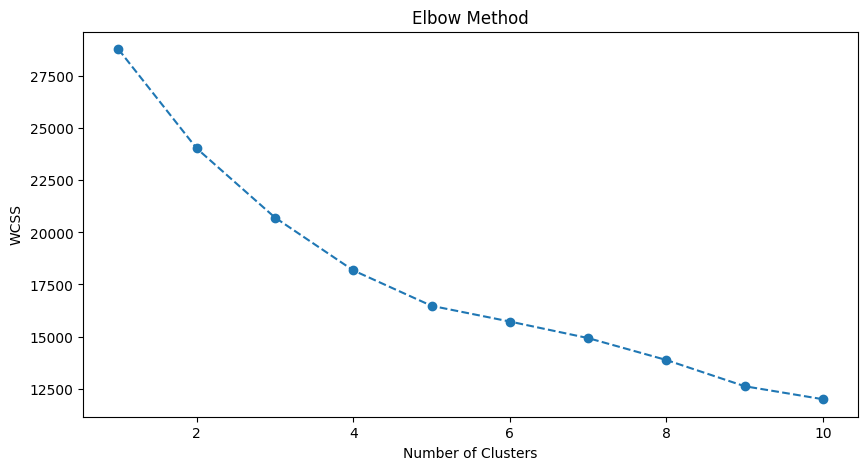

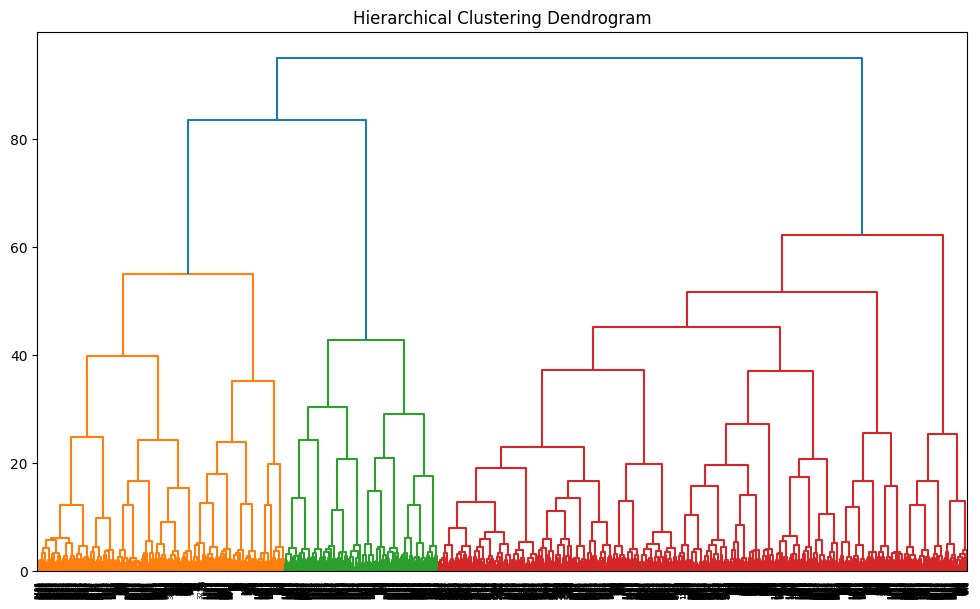

Cluster Profiles (Average Scores):


,Linguistic,Musical,Bodily,Logical - Mathematical,Spatial-Visualization,Interpersonal,Intrapersonal,Naturalist
Cluster_Label,,,,,,,,
0,14.805257,15.701314,13.121864,12.043011,7.954600,16.005974,14.324970,11.187575
1,9.696819,7.219682,15.390656,14.746521,10.897614,14.252485,13.556660,15.154076
2,14.162777,7.929994,9.688674,17.599886,9.992032,16.068298,15.664769,8.605009


In [31]:
# 1. Scaling (Crucial for Clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[features])

# 2. Elbow Method (Finding Optimal K)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# 3. Hierarchical Clustering (Dendrogram)
plt.figure(figsize=(12, 7))
linked = linkage(X_scaled, method='ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# 4. Apply K-Means (Assuming K=3 based on analysis)
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster_Label'] = kmeans.fit_predict(X_scaled)

# 5. Cluster Profiling (Interpretation)
print("Cluster Profiles (Average Scores):")
display(data.groupby('Cluster_Label')[features].mean())

In [37]:
# 1. Import the necessary tools
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 2. Prepare the data
# (We assume you have already run the 'data' loading cell)
X = data[features]
y = data['Job profession']

# 3. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Check the score
test_predictions = model.predict(X_test)
score = accuracy_score(y_test, test_predictions)

print("✅ Model Trained Successfully!")
print(f"Final Accuracy: {score * 100:.2f}%")

✅ Model Trained Successfully!
Final Accuracy: 97.22%


/var/folders/jn/rsz93r615x19rmqn0pywgnhm0000gn/T/ipykernel_89762/3372295275.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Trait', data=feature_imp, palette='viridis')


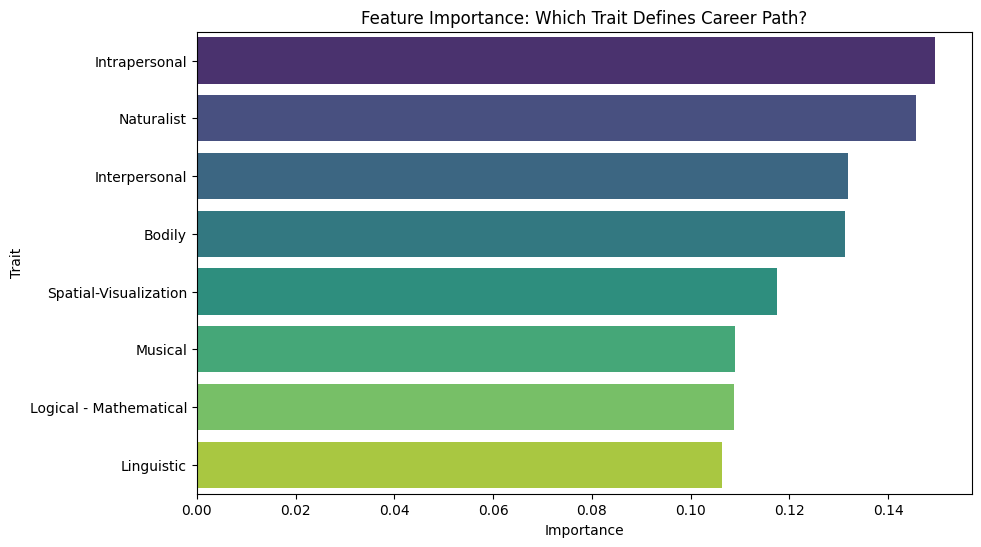

In [38]:
# Which trait drives career choice the most?
importances = rf_model.feature_importances_
feature_imp = pd.DataFrame({'Trait': features, 'Importance': importances})
feature_imp = feature_imp.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Trait', data=feature_imp, palette='viridis')
plt.title("Feature Importance: Which Trait Defines Career Path?")
plt.show()